## Comparing the performance of FCNN and CNN on the Fashion MNIST Dataset

In [1]:
#importing the necessary libararies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

2024-08-09 12:09:17.915022: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 12:09:17.939122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 12:09:18.358371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#loading the Fashion MNIST Dataset from keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
#finding the number of classes
classes = set(y_train)
print("Number of classes:", len(classes))

Number of classes: 10


In [4]:
dimensions = x_train[0].shape
print("Dimension of each image:", dimensions)

Dimension of each image: (28, 28)


Training set shape: (60000, 28, 28)
Training set shape: (10000, 28, 28)



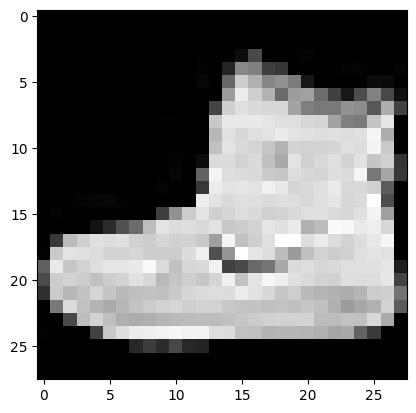

In [5]:
print(f"Training set shape: {x_train.shape}")
print(f"Training set shape: {x_test.shape}\n")

#find minimum and maximum values of one sample data
np.max(x_train[0])
np.min(x_train[0])

#display one sample data/image in gray-scale
plt.imshow(x_train[0],cmap="gray")

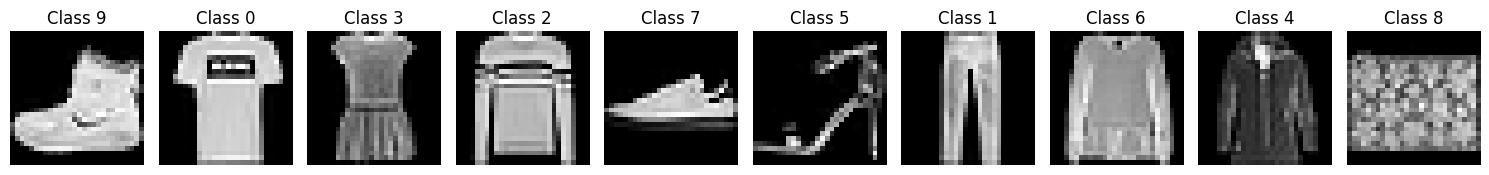

In [6]:
#displaying the first image from each class
import matplotlib.pyplot as plt

class_images = {}

for x_image, y_class in zip(x_train, y_train):
    if y_class not in class_images:
        class_images[y_class] = x_image

num_classes = len(class_images)

fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))

for ax, (y_class, image) in zip(axes, class_images.items()):
    ax.imshow(image, cmap="gray")
    ax.set_title(f'Class {y_class}')
    ax.axis('off')  

plt.tight_layout()
plt.show()


## 1) Training the FCNN

In [7]:
#defining the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model.add(tf.keras.layers.Dense(256, activation="relu", name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer2"),)
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 256)               200960    
                                                                 
 HiddenLayer2 (Dense)        (None, 128)               32896     
                                                                 
 outputLayer (Dense)         (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-08-09 12:09:19.669042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-09 12:09:19.683102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-09 12:09:19.683243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=1e-4) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [9]:
batch_size = 16   #specifies the number of training data used for 1 iteration
epochs = 10       #After an epoch is completed the DNN has seen all of your data and updated its weights accordingly

#to keep track of execution time
import datetime
start = datetime.datetime.now()

#to fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

#to keep track of execution time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)

Epoch 1/10


2024-08-09 12:09:20.916916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-08-09 12:09:20.918188: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f44d4681a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-09 12:09:20.918199: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-09 12:09:20.920952: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-09 12:09:21.001453: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-08-09 12:09:21.062018: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

1688/1688 [==============================] - 3s 1ms/step - loss: 6.4997 - accuracy: 0.7448 - val_loss: 2.5374 - val_accuracy: 0.7982
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 2.0442 - accuracy: 0.8002 - val_loss: 1.6775 - val_accuracy: 0.7890
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2607 - accuracy: 0.8154 - val_loss: 1.2659 - val_accuracy: 0.8090
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8896 - accuracy: 0.8301 - val_loss: 0.9736 - val_accuracy: 0.8257
Epoch 5/10
1688/1688 [==============================] - 2s 984us/step - loss: 0.6622 - accuracy: 0.8424 - val_loss: 0.7502 - val_accuracy: 0.8315
Epoch 6/10
1688/1688 [==============================] - 2s 994us/step - loss: 0.5250 - accuracy: 0.8540 - val_loss: 0.6794 - val_accuracy: 0.8432
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4471 - accuracy: 0.8625 - val_loss: 0.6231 - val_accuracy: 0.8482

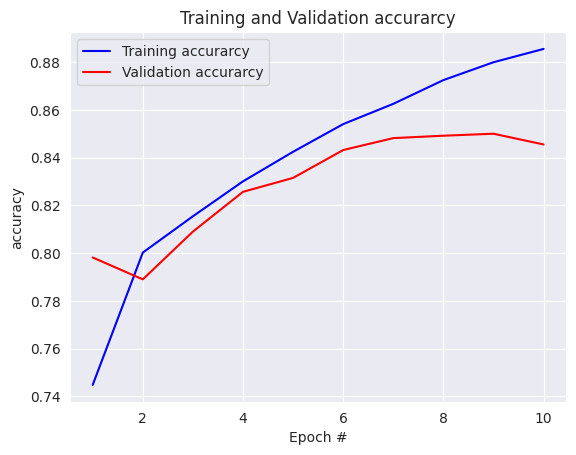

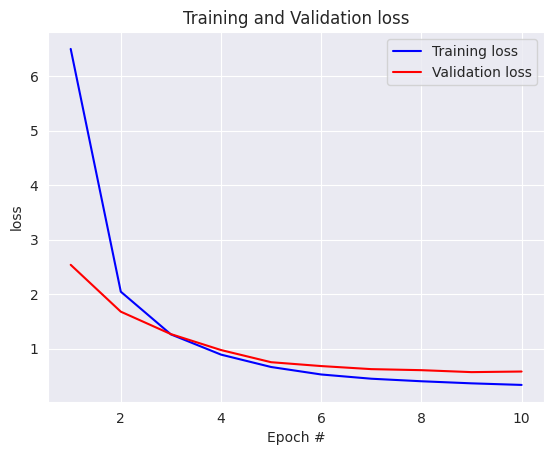

In [10]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [11]:
#evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 668us/step - loss: 0.6063 - accuracy: 0.8474


[0.6063331961631775, 0.8474000096321106]

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_hat = model.predict(x_test, batch_size=32)

#assign the class to the test data, which has max. probability value in y_hat
classes = np.argmax(y_hat, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(y_test, classes)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm)

313/313 [==============================] - 0s 460us/step
Confusion Matrix
[[891   0  15  22   2   2  54   0  14   0]
 [ 19 939   8  27   1   2   4   0   0   0]
 [ 37   2 800  22  65   1  70   0   3   0]
 [ 66   5  14 859   7   1  43   0   5   0]
 [  4   0 183  58 636   0 109   1   9   0]
 [  1   0   0   2   1 956   0  20   6  14]
 [201   0 123  31  42   1 587   0  15   0]
 [  0   0   0   0   0  39   0 912   2  47]
 [ 18   0   3   6   3   3  11   5 950   1]
 [  3   0   0   1   0  24   0  28   0 944]]


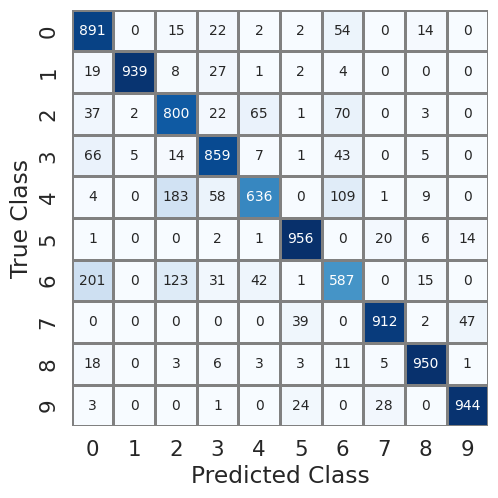

In [13]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 0)#, fontsize = 1)

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

plt.show()

## 2) Training CNN-1

In [14]:
#defining the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=5, activation="relu", input_shape=(28,28,1),  name="inputLayer", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, name="poolingLayer"))
model.add(tf.keras.layers.Flatten(name="flattenLayer"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Conv2D)         (None, 24, 24, 32)        832       
                                                                 
 poolingLayer (MaxPooling2D  (None, 12, 12, 32)        0         
 )                                                               
                                                                 
 flattenLayer (Flatten)      (None, 4608)              0         
                                                                 
 hiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [16]:
batch_size = 16   #specifies the number of training data used for 1 iteration
epochs = 10       #After an epoch is completed the DNN has seen all of your data and updated its weights accordingly

#to keep track of execution time
import datetime
start = datetime.datetime.now()

#to fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

#to keep track of execution time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 1.5433 - accuracy: 0.7837 - val_loss: 0.6353 - val_accuracy: 0.8347
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4863 - accuracy: 0.8516 - val_loss: 0.4638 - val_accuracy: 0.8497
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3561 - accuracy: 0.8783 - val_loss: 0.3968 - val_accuracy: 0.8696
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.8958 - val_loss: 0.3602 - val_accuracy: 0.8800
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2477 - accuracy: 0.9103 - val_loss: 0.3472 - val_accuracy: 0.8850
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2158 - accuracy: 0.9222 - val_loss: 0.3549 - val_accuracy: 0.8821
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1865 - accuracy: 0.9294 - val_loss: 0.3297 - val_accuracy:

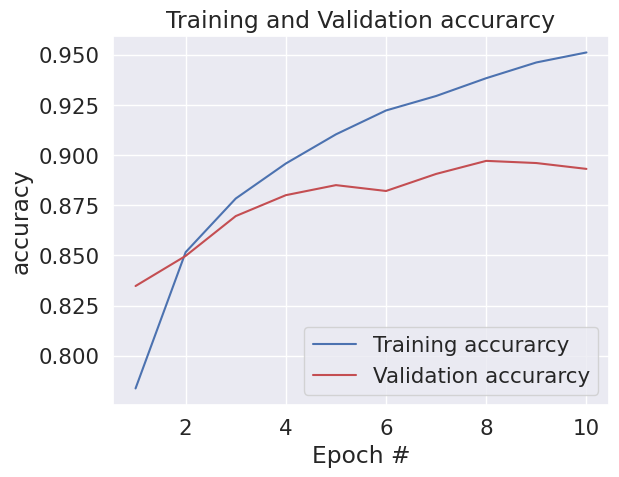

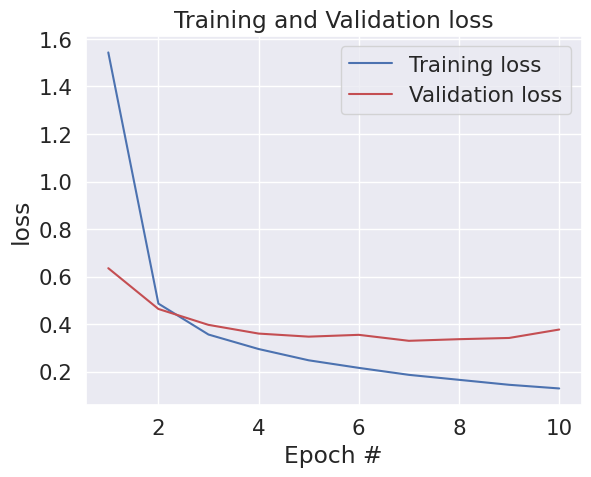

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [18]:
#evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 790us/step - loss: 0.3887 - accuracy: 0.8883


[0.38873007893562317, 0.8883000016212463]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_hat = model.predict(x_test, batch_size=32)

#assign the class to the test data, which has max. probability value in y_hat
classes = np.argmax(y_hat, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(y_test, classes)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm)

313/313 [==============================] - 0s 458us/step
Confusion Matrix
[[889   0  12  30   2   0  56   2   9   0]
 [  5 975   1  14   1   0   1   0   3   0]
 [ 28   0 834  14  87   0  32   0   5   0]
 [ 27   1   7 927  14   0  20   1   3   0]
 [  4   0  61  49 844   0  37   0   5   0]
 [  1   0   0   1   0 948   0  41   3   6]
 [197   1 104  37  92   0 555   0  14   0]
 [  0   0   0   0   0   4   0 975   0  21]
 [  4   0   2   3   4   1   2   3 981   0]
 [  0   0   0   0   0   8   1  36   0 955]]


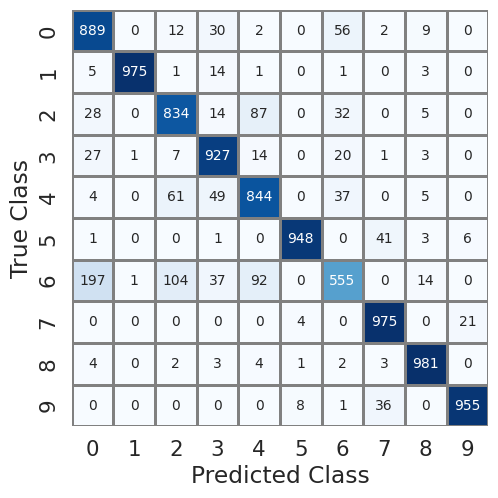

In [20]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 0)#, fontsize = 1)

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

plt.show()

## 3) Training CNN-2

In [21]:
#defining the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1),  name="convolutionLayer1", padding="valid"))
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1),  name="convolutionLayer2", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, name="poolingLayer"))
model.add(tf.keras.layers.Flatten(name="flattenLayer"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolutionLayer1 (Conv2D)  (None, 26, 26, 32)        320       
                                                                 
 convolutionLayer2 (Conv2D)  (None, 24, 24, 32)        9248      
                                                                 
 poolingLayer (MaxPooling2D  (None, 12, 12, 32)        0         
 )                                                               
                                                                 
 flattenLayer (Flatten)      (None, 4608)              0         
                                                                 
 hiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [23]:
batch_size = 16   #specifies the number of training data used for 1 iteration
epochs = 10       #After an epoch is completed the DNN has seen all of your data and updated its weights accordingly

#to keep track of execution time
import datetime
start = datetime.datetime.now()

#to fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

#to keep track of execution time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.9329 - accuracy: 0.7958 - val_loss: 0.5444 - val_accuracy: 0.8164
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3681 - accuracy: 0.8727 - val_loss: 0.3868 - val_accuracy: 0.8642
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.8982 - val_loss: 0.3302 - val_accuracy: 0.8852
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2303 - accuracy: 0.9160 - val_loss: 0.3169 - val_accuracy: 0.8907
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1930 - accuracy: 0.9293 - val_loss: 0.3065 - val_accuracy: 0.8962
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1584 - accuracy: 0.9411 - val_loss: 0.2982 - val_accuracy: 0.9021
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1285 - accuracy: 0.9526 - val_loss: 0.3394 - val_accuracy:

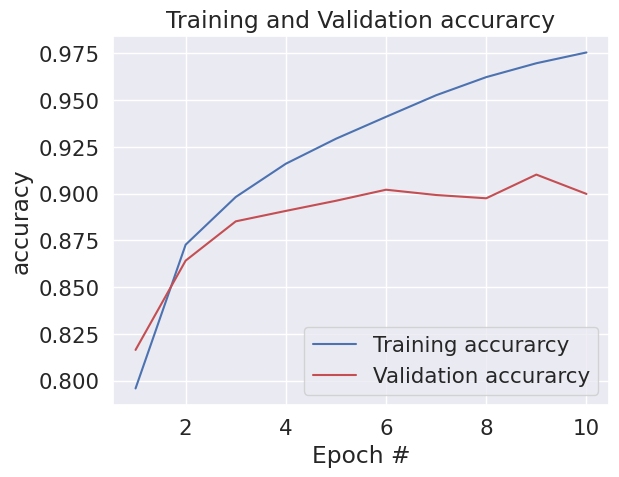

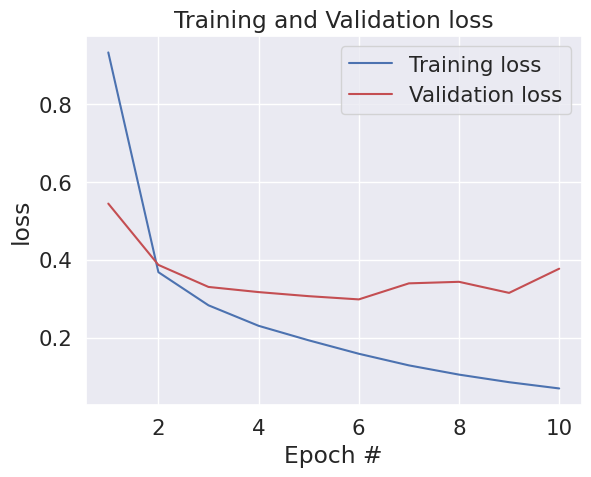

In [24]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [25]:
#evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8980


[0.3881518244743347, 0.8980000019073486]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_hat = model.predict(x_test, batch_size=32)

#assign the class to the test data, which has max. probability value in y_hat
classes = np.argmax(y_hat, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(y_test, classes)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm)

313/313 [==============================] - 0s 500us/step
Confusion Matrix
[[844   2  22  17   0   1 105   1   8   0]
 [  1 976   0  11   5   0   7   0   0   0]
 [ 17   1 896   7  26   0  53   0   0   0]
 [ 18   8  16 903   8   0  44   0   3   0]
 [  1   1 142  38 731   0  87   0   0   0]
 [  0   0   0   0   0 977   0  13   1   9]
 [ 78   1  88  25  25   0 778   0   5   0]
 [  0   0   0   0   0  16   0 977   0   7]
 [  5   0   5   4   1   2   9   3 971   0]
 [  0   0   1   0   0   5   0  67   0 927]]


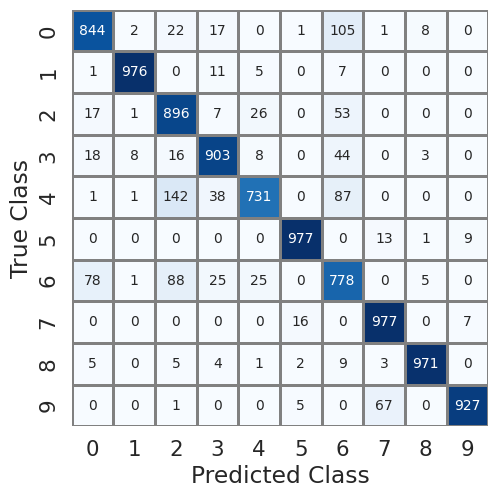

In [27]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 0)#, fontsize = 1)

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

plt.show()

### As we can observe, the Convolutional Neural Networks clearly outperform the Fully Connected Neural Network, despite having fewer parameters!